In [1]:
import main as m
import homography as h
import filter as f
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from PIL import Image

from homography import FillBasedOnNeighbour

In [2]:
I = Image.open("images/rawtransparent.png", mode="r").convert('RGBA')
image_array = np.array(I)

alpha = image_array[..., 3]
Img = (0.299 * image_array[..., 0] +
             0.587 * image_array[..., 1] +
             0.114 * image_array[..., 2]).astype(np.float32)
Img[alpha == 0] = -1

In [3]:
NewImage = h.FillBasedOnNeighbour(Img)

In [4]:
Sharp = f.Unsharp(NewImage)

In [5]:
CannyX, CannyY = m.Canny(Sharp)

In [6]:
Angle, Edge = m.NormeAngle(CannyX, CannyY)

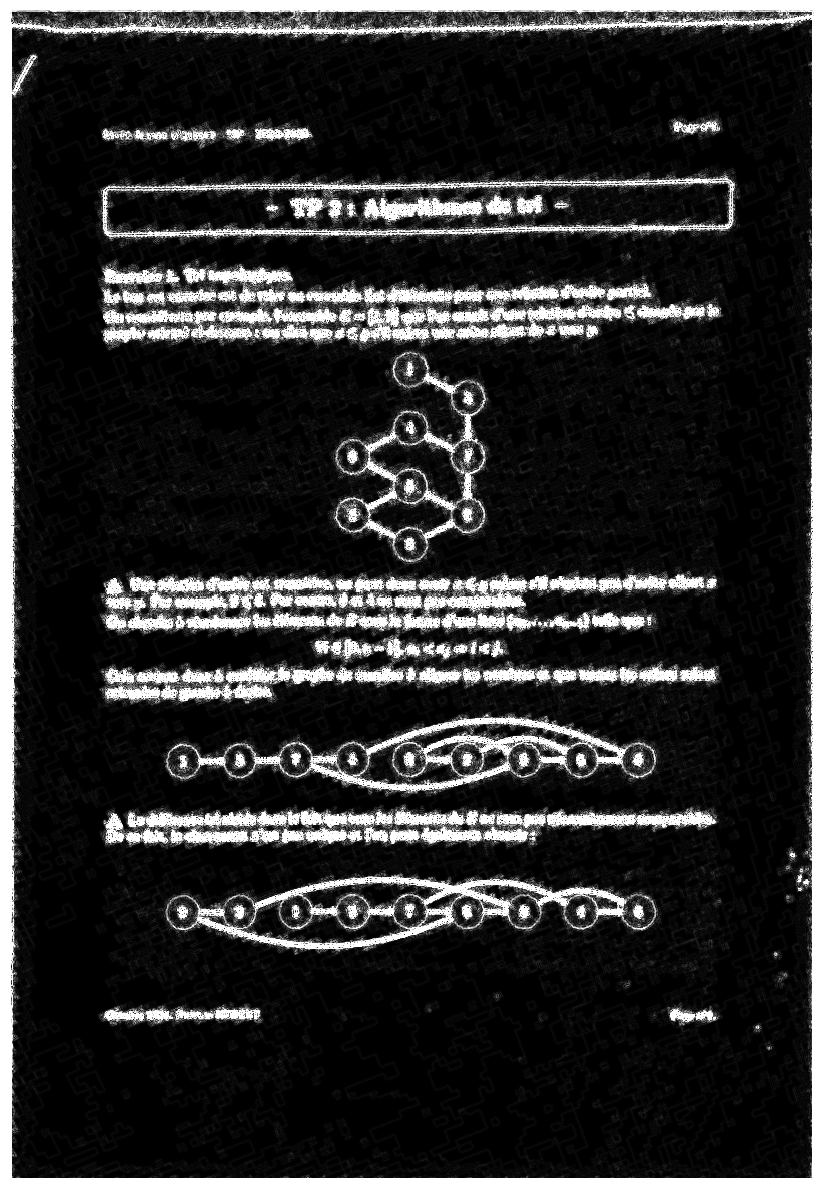

In [7]:
m.Afficher(Edge)

In [8]:
f.FADIT(Edge)

UnboundLocalError: cannot access local variable 'Img' where it is not associated with a value

In [13]:
print(f.CacheImage)

[[0.]]


In [ ]:
def Padding(I, px : int, py : int):
    x, y = I.shape
    R = np.zeros((x-2*px, y-2*py))
    for i in range(px, x-px):
        for j in range(py, y-py):
            R[i-px,j-py] = I[i,j]
    return R

In [ ]:
PadImg = Padding(NewImage, 100, 10)

In [ ]:
m.Afficher(PadImg)

In [ ]:
PixelCount = {x:0 for x in range(256)}
x, y = PadImg.shape
for i in range(x):
    for j in range(y):
        PixelCount[PadImg[i,j]] += 1

In [ ]:
def Proba(n, D=PixelCount):
    return D[n]/(x*y)

In [ ]:
Proba(217)

In [ ]:
PixelMoy = 0
for n in range(1, 255):
    PixelMoy += n*Proba(n)
print(PixelMoy)

In [ ]:
def Moyenne(L, P):
    return PixelMoy

In [ ]:
def Criterion(P, L=255):
    t_max = 0
    C_max = 0
    for t in range(L):
        S_t = Pi(P, t)
        moy = Moyenne(L, P)
        f_t = moy / ((moy) + (t*(t+1)/2)*(1 - (moy/(L-1))))
        C_t = 2*S_t*f_t - S_t - f_t + 1
        if C_t > C_max:
            C_max = C_t
            t_max = t
    return t_max

def Pi(P, t):
    S = 0
    for n in range(t+1):
        S += P(n)
    return S

In [ ]:
Criterion(Proba)

In [ ]:
print(NewImage)

In [ ]:
R = np.zeros((x,y))
treshold = Criterion(Proba)
for i in range(x):
    for j in range(y):
        if PadImg[i,j] < treshold:
            R[i,j] = PadImg[i,j] / 10
        else:
            R[i,j] = 255

In [ ]:
m.Afficher(R)

In [ ]:
def CloneNeighbour(M, P, r=1):
    x, y = P
    Points = []
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            if 0 <= x+i < M.shape[0] and 0 <= y+j < M.shape[1]:
                if  M[x+i][y+j] != -1:
                    Points.append(M[x+i, y+j])
    return np.mean(Points)

In [ ]:
for i in range(x):
    for j in range(y):
        if R[i,j] == 0:
            break
        P = CloneNeighbour(R, (i,j))
        R[i,j] = P

In [ ]:
m.Afficher(R)